In [1]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [2]:
n=100

In [6]:
x = torch.ones(n,2) 

In [8]:
x[:,0].uniform_(-1.,1)

tensor([ 0.4319, -0.0974,  0.3679, -0.2058, -0.3541, -0.8480,  0.6335, -0.4340,
        -0.9529,  0.9835,  0.9333, -0.0680,  0.4850, -0.1308,  0.2792,  0.3931,
         0.0750, -0.9065, -0.0334,  0.3752,  0.9380,  0.7824,  0.7684, -0.0547,
         0.5124,  0.3795,  0.8728, -0.8526,  0.6553, -0.4080, -0.0870,  0.3414,
        -0.8855, -0.2912,  0.2074,  0.4129, -0.7350,  0.9145,  0.2944, -0.8606,
         0.7247,  0.1366,  0.2449, -0.3965, -0.5046,  0.1912, -0.5259, -0.1345,
         0.9607, -0.9374, -0.1584,  0.9585, -0.8108,  0.0166,  0.5363,  0.3655,
         0.3962,  0.2480, -0.2326, -0.9986, -0.2921,  0.4526,  0.8564,  0.9728,
         0.3749,  0.9500, -0.5810, -0.3568, -0.8828, -0.6879, -0.7964,  0.9547,
         0.4544, -0.2393, -0.3597,  0.4561, -0.1628,  0.2893,  0.2466,  0.8502,
         0.7157,  0.2890, -0.9432,  0.7608, -0.7164, -0.4906, -0.2425,  0.2538,
         0.6684, -0.3802,  0.4113,  0.7610,  0.1403, -0.6115, -0.7532,  0.8994,
         0.0417, -0.1202, -0.2569,  0.83

In [9]:
x[:5]

tensor([[ 0.4319,  1.0000],
        [-0.0974,  1.0000],
        [ 0.3679,  1.0000],
        [-0.2058,  1.0000],
        [-0.3541,  1.0000]])

In [17]:
a = tensor(3.,2)
a,a.size()

(tensor([3., 2.]), torch.Size([2]))

In [11]:
a.size(),x.size()

(torch.Size([2]), torch.Size([100, 2]))

In [15]:
y = x@a + torch.rand(n)

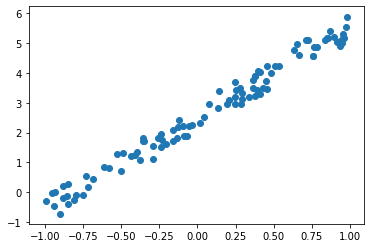

In [16]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [18]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [19]:
a = tensor(-1.,1)

In [20]:
y_hat = x@a
mse(y_hat, y)

tensor(8.8405)

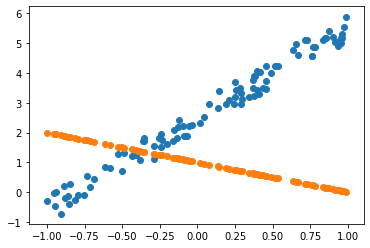

In [21]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [22]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [23]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [24]:
lr = 1e-1
for t in range(100): update()

tensor(8.8405, grad_fn=<MeanBackward0>)
tensor(1.3132, grad_fn=<MeanBackward0>)
tensor(0.3620, grad_fn=<MeanBackward0>)
tensor(0.1405, grad_fn=<MeanBackward0>)
tensor(0.0868, grad_fn=<MeanBackward0>)
tensor(0.0738, grad_fn=<MeanBackward0>)
tensor(0.0706, grad_fn=<MeanBackward0>)
tensor(0.0698, grad_fn=<MeanBackward0>)
tensor(0.0697, grad_fn=<MeanBackward0>)
tensor(0.0696, grad_fn=<MeanBackward0>)


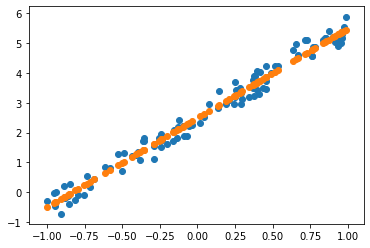

In [25]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a);

## Animate it!

In [26]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [27]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.